<a href="https://colab.research.google.com/github/MohammadGhodsi/welltest_analysis_project/blob/main/welltest_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import tensorflow as tf
import numpy as np 
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
df = pd.read_csv('/content/drive/MyDrive/University_project/primary_dataset.csv')

In [4]:
df.head(3)

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft),re(ft),S,k(md),Cs(RB/psi),Doi
0,0.01,3957.78,4000.0,42.22,3.6,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35,100.0,-2.3,16.05,0.01,NaN
1,0.01,3957.78,4000.0,42.22,3.6,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35,100.0,-2.3,16.05,0.01,NaN
2,0.01,3957.78,4000.0,42.22,3.6,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35,100.0,-2.3,16.05,0.01,NaN


In [5]:
X = df.iloc[:,0:13]
X

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft)
0,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
1,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
2,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
3,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
4,0.01,3957.78,4000.0,42.22,3.60,3170.0,1.26,0.74,0.25,0.000004,0.01,137.0,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,10265.02,3267.05,4000.0,732.95,0.00,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38
5074,10816.58,3267.05,4000.0,732.95,0.00,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38
5075,11397.77,3267.05,4000.0,732.95,0.00,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38
5076,12010.19,3267.05,4000.0,732.95,-0.01,90.5,1.00,1.00,0.05,0.000010,0.50,10.0,0.38


In [6]:
Y = df.iloc[:,13:17]
Y

,re(ft),S,k(md),Cs(RB/psi)
0,100.0,-2.3,16.05,0.01
1,100.0,-2.3,16.05,0.01
2,100.0,-2.3,16.05,0.01
3,100.0,-2.3,16.05,0.01
4,100.0,-2.3,16.05,0.01
...,...,...,...,...
5073,351.0,0.0,0.01,1000.00
5074,351.0,0.0,0.01,1000.00
5075,351.0,0.0,0.01,1000.00
5076,351.0,0.0,0.01,1000.00


In [7]:
np.array(Y, dtype=np.float)
np.array(X, dtype=np.float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


array([[1.000000e-02, 3.957780e+03, 4.000000e+03, ..., 1.000000e-02,
        1.370000e+02, 3.500000e-01],
       [1.000000e-02, 3.957780e+03, 4.000000e+03, ..., 1.000000e-02,
        1.370000e+02, 3.500000e-01],
       [1.000000e-02, 3.957780e+03, 4.000000e+03, ..., 1.000000e-02,
        1.370000e+02, 3.500000e-01],
       ...,
       [1.139777e+04, 3.267050e+03, 4.000000e+03, ..., 5.000000e-01,
        1.000000e+01, 3.800000e-01],
       [1.201019e+04, 3.267050e+03, 4.000000e+03, ..., 5.000000e-01,
        1.000000e+01, 3.800000e-01],
       [1.265523e+04, 3.255680e+03, 4.000000e+03, ..., 5.000000e-01,
        1.000000e+01, 3.800000e-01]])

In [8]:
from keras.models import Sequential 
from keras.layers import Activation, Dense 
from keras import initializers 
from keras import regularizers 
from keras import constraints 

model = Sequential() 

model.add(Dense(32, input_shape=(13,), kernel_initializer = 'he_uniform', 
   kernel_regularizer = None, kernel_constraint = 'MaxNorm', activation = 'relu')) 
model.add(Dense(16, activation = 'relu')) 
model.add(Dense(4))

In [9]:
# compile the keras model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [10]:
# fit the keras model on the dataset
model.fit(X,Y,epochs=150, batch_size=16, validation_split=0.25,shuffle=True)

Epoch 1/150
238/238 [==============================] - 1s 3ms/step - loss: -4829.9766 - accuracy: 0.0160 - val_loss: -33602.3320 - val_accuracy: 0.3449
Epoch 2/150
238/238 [==============================] - 1s 2ms/step - loss: -4841.1963 - accuracy: 0.0155 - val_loss: -33598.0312 - val_accuracy: 0.3449
Epoch 3/150
238/238 [==============================] - 0s 2ms/step - loss: -4841.1709 - accuracy: 0.0160 - val_loss: -33598.0312 - val_accuracy: 0.3449
Epoch 4/150
238/238 [==============================] - 1s 2ms/step - loss: -4841.1729 - accuracy: 0.0160 - val_loss: -33598.0312 - val_accuracy: 0.3449
Epoch 5/150
238/238 [==============================] - 1s 2ms/step - loss: -4841.1729 - accuracy: 0.0160 - val_loss: -33598.0312 - val_accuracy: 0.3449
Epoch 6/150
238/238 [==============================] - 1s 2ms/step - loss: -4841.1724 - accuracy: 0.0160 - val_loss: -33598.0312 - val_accuracy: 0.3449
Epoch 7/150
238/238 [==============================] - 1s 2ms/step - loss: -4841.1729 - 

In [11]:
model.evaluate(X,Y, batch_size=32,verbose = 1)

159/159 [==============================] - 0s 1ms/step - loss: 353.3696 - accuracy: 0.0498


[353.36962890625, 0.049822766333818436]

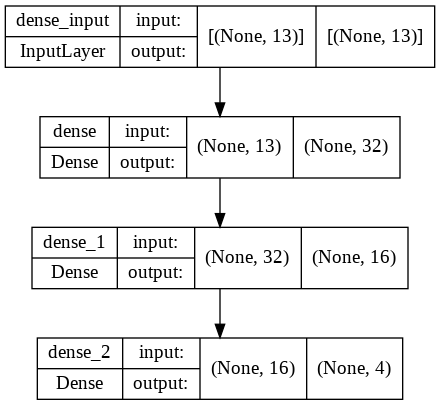

In [12]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [13]:
dataset_test = pd.read_csv('/content/drive/MyDrive/University_project/test_data.csv')

In [14]:
dataset_test.head(5)

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft),re(ft),S,k(md),Cs(RB/psi),Doi
0,0.0,3696.59,4000,303.41,-108000.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
1,0.0,3692.05,4000,307.95,-29300.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
2,0.0,3692.05,4000,307.95,-14000.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
3,0.0,3689.77,4000,310.23,-13200.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN
4,0.0,3689.77,4000,310.23,-12500.0,90.5,1,1,0.05,0.00001,0.5,10,0.38,351,0,0.01,1000,NaN


In [15]:
X_test = dataset_test.iloc[:,0:13]
X_test

,Dt(hr),Pwf(psi),Pi(psi),DP(psi),Dp',Qo(bbl/d),Bo(bbl/STB),viscosity oil(cp),porosity,Ct(psi^-1),Co(bbl/psi),h(ft),rw(ft)
0,0.00,3696.59,4000,303.41,-108000.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
1,0.00,3692.05,4000,307.95,-29300.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
2,0.00,3692.05,4000,307.95,-14000.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
3,0.00,3689.77,4000,310.23,-13200.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
4,0.00,3689.77,4000,310.23,-12500.00,90.5,1,1,0.05,0.00001,0.5,10,0.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,7.90,3498.86,4000,501.14,-2.74,90.5,1,1,0.05,0.00001,0.5,10,0.38
166,8.33,3496.59,4000,503.41,-2.60,90.5,1,1,0.05,0.00001,0.5,10,0.38
167,8.77,3496.59,4000,503.41,-2.47,90.5,1,1,0.05,0.00001,0.5,10,0.38
168,9.25,3494.32,4000,505.68,-2.34,90.5,1,1,0.05,0.00001,0.5,10,0.38


In [19]:
predictions = model.predict(X_test, batch_size=16,verbose=1)
predictions

11/11 [==============================] - 0s 2ms/step


array([[ 7.55776367e+02, -2.28982227e+03, -1.87556836e+04,
         9.18363770e+03],
       [ 2.30122778e+03, -5.78960571e+02, -3.32294067e+03,
         3.20358472e+03],
       [ 2.76209131e+03, -1.79716454e+01, -5.08912994e+02,
         2.49475391e+03],
       [ 2.76681616e+03,  1.24448595e+01, -3.68338898e+02,
         2.46145557e+03],
       [ 2.74279346e+03,  7.21669083e+01, -3.14148407e+02,
         2.49797827e+03],
       [ 2.71958276e+03,  1.24856071e+02, -2.71240692e+02,
         2.53179297e+03],
       [ 2.69691260e+03,  1.77882782e+02, -2.28679535e+02,
         2.56673560e+03],
       [ 2.65926440e+03, -2.49828430e+02, -1.87522437e+03,
         2.86301953e+03],
       [ 2.70836572e+03, -2.04151794e+02, -1.67391223e+03,
         2.81529053e+03],
       [ 2.63923096e+03,  2.53357361e+02, -8.80278625e+01,
         2.65843750e+03],
       [ 2.62286182e+03,  2.79757782e+02, -5.96812439e+01,
         2.68934058e+03],
       [ 2.60705127e+03,  3.04693634e+02, -3.31396790e+01,
      

In [23]:
np.savetxt("/content/drive/MyDrive/University_project/prediction.csv", predictions, delimiter=",")

In [67]:
pred_df = pd.read_csv('/content/drive/MyDrive/University_project/prediction.csv')





In [68]:
pred_df

,7.557763671875000000e+02,-2.289822265625000000e+03,-1.875568359375000000e+04,9.183637695312500000e+03
0,2301.227783,-578.960571,-3322.940674,3203.584717
1,2762.091309,-17.971645,-508.912994,2494.753906
2,2766.816162,12.444860,-368.338898,2461.455566
3,2742.793457,72.166908,-314.148407,2497.978271
4,2719.582764,124.856071,-271.240692,2531.792969
...,...,...,...,...
164,3157.707764,3872.407959,12.786651,3684.766602
165,3158.603027,3872.067383,13.743072,3684.908447
166,3158.549316,3872.196533,13.698089,3684.986328
167,3159.432617,3871.857422,14.645415,3685.132080


In [70]:
pred_permeability  = pred_df.iloc[0:160:,2]
pred_permeability

0     -3322.940674
1      -508.912994
2      -368.338898
3      -314.148407
4      -271.240692
          ...     
155       7.954193
156       8.953826
157       8.949859
158       9.938445
159       9.924895
Name: -1.875568359375000000e+04, Length: 160, dtype: float64

In [71]:
test_permeability =  dataset_test.iloc[0:160,15]
test_permeability

0      0.01
1      0.01
2      0.01
3      0.01
4      0.01
       ... 
155    0.01
156    0.01
157    0.01
158    0.01
159    0.01
Name: k(md), Length: 160, dtype: float64

plot predicted data vs actual data (permeability)

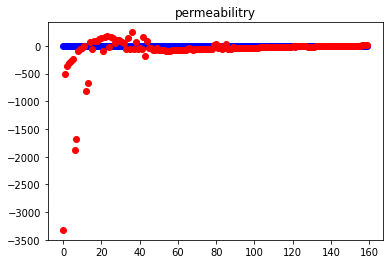

In [73]:
import matplotlib.pyplot as plt
import numpy as np


def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(range(len(y_test)), y_test, color='blue') # for test data
    plt.scatter(range(len(y_pred)), y_pred, color='red') # for prediction data
    plt.title(regressorName)
    plt.show()
    return




plotGraph(test_permeability,pred_permeability, "permeabilitry")


plot predicted data vs actual data (Skin)

In [74]:
test_Skin =  dataset_test.iloc[0:160,14]
test_Skin

0      0
1      0
2      0
3      0
4      0
      ..
155    0
156    0
157    0
158    0
159    0
Name: S, Length: 160, dtype: int64

In [75]:
pred_Skin  = pred_df.iloc[0:160:,1]
pred_Skin

0      -578.960571
1       -17.971645
2        12.444860
3        72.166908
4       124.856071
          ...     
155    3873.475586
156    3873.155273
157    3873.318604
158    3872.992188
159    3873.143066
Name: -2.289822265625000000e+03, Length: 160, dtype: float64

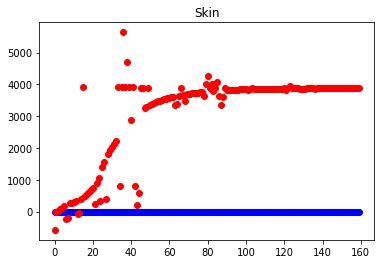

In [76]:
plotGraph(test_Skin,pred_Skin, "Skin")

plot predicted data vs actual data (radius of investigation)

In [80]:
pred_radius_of_investigarion  = pred_df.iloc[0:160:,0]
pred_radius_of_investigarion

0      2301.227783
1      2762.091309
2      2766.816162
3      2742.793457
4      2719.582764
          ...     
155    3153.137695
156    3154.088867
157    3154.092285
158    3155.030762
159    3155.020508
Name: 7.557763671875000000e+02, Length: 160, dtype: float64

In [81]:
test_radius_of_investigarion =  dataset_test.iloc[0:160,13]
test_radius_of_investigarion

0      351
1      351
2      351
3      351
4      351
      ... 
155    351
156    351
157    351
158    351
159    351
Name: re(ft), Length: 160, dtype: int64

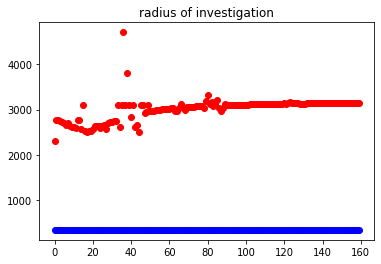

In [83]:
plotGraph(test_radius_of_investigarion,pred_radius_of_investigarion, "radius of investigation")